<a href="https://colab.research.google.com/github/Rishika-Pandit/Cartoonify/blob/main/CartoonifyImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load Image 
def read_file(filename):
  img= cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

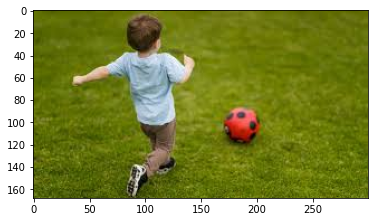

In [ ]:
filename = "/content/cartoonify.jpg"
img= read_file(filename)

In [ ]:
#Create Edge Mask 
def edge_mask(img, line_size, blur_value):
  """
   input: input image 
   output: Edges of images 
  """
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

  return edges 

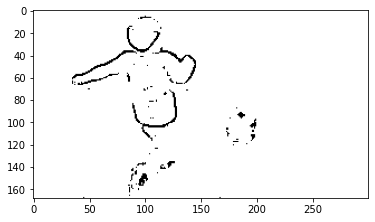

In [ ]:
line_size, blur_value= 5,7 
edges= edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap= "gray")
plt.show()

In [ ]:
#Reduce Colour Palette
def color_quantization(img, k):

  #Transform Image 
  data= np.float32(img).reshape((-1,3))

  #Determine Criteria
  criteria= (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implementing k-Means

  ret, label, center= cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

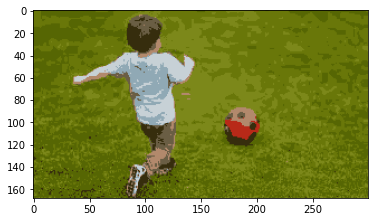

In [ ]:
img = color_quantization(img, 9)

plt.imshow(img)
plt.show()

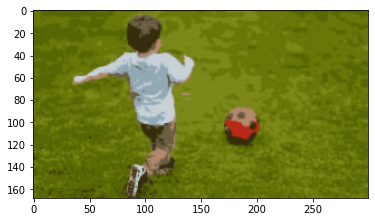

In [ ]:
#Reduce the Noise
blurred = cv2.bilateralFilter(img, d=3, sigmaColor= 200, sigmaSpace= 200)

plt.imshow(blurred)
plt.show()

In [ ]:
#Combine Edge Mask with the Quantiz Image 
def cartoon():
  c = cv2.bitwise_and(blurred, blurred, mask= edges)

  plt.imshow(c)
  plt.show()

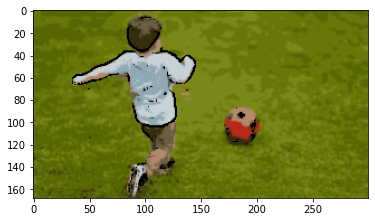

In [ ]:
cartoon()